In [47]:
#library
import pandas as pd
import os
import matplotlib.pyplot as plt

### Merging Data 

In [11]:
#menggabungkan beberapa csv file dari beberapa bulan

df = pd.read_csv("SalesAnalysis/Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./SalesAnalysis/Sales_Data/')]

df_all = pd.DataFrame()

for file in files:
    df = pd.read_csv("SalesAnalysis/Sales_Data/"+file)
    df_all = pd.concat([df_all, df])
    
df_all.to_csv("all_data.csv", index=False)

In [12]:
df_data = pd.read_csv("all_data.csv")
df_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### EDA

In [17]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


data terdapat 186850 baris dan 6 kolom 

In [18]:
##mencari unique value dalam df
df_data.describe(include='all').loc['unique']

Order ID            178438
Product                 20
Quantity Ordered        10
Price Each              24
Order Date          142396
Purchase Address    140788
Name: unique, dtype: object

In [13]:
 df_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

**order date** masih berupa object, sebaiknya diganti menjadi bentuk `datetime`, sebelum dirubah juga dilihat apakah terdapat NaN value di dalam kolom tersebut

#### Mengganti tipe data order date

In [28]:
nan_data['Order Date'] = pd.to_datetime(nan_data['Order Date'])
nan_data.dtypes ##gagal dalam merubah tipe data

ParserError: Unknown string format: Order Date

In [14]:
df_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

terdapat sebanyakan `545 data` yang merupakan NaN dari masing-masing kolom, dicoba untuk menghapus missing value yang ada

#### Menghapus Nilai NaN

In [27]:
nan_data = df_data.copy()
nan_data = nan_data.dropna(how='all')
nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Augment Data

In [30]:
#menghapus nilai or yang ada dalam order date

nan_data = nan_data[nan_data['Order Date'].str[0:2] != 'Or']

In [31]:
nan_data['Month'] = nan_data['Order Date'].str[0:2]
nan_data['Month'] = nan_data['Month'].astype('int32')
nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [39]:
#mengkonversi QO dan PE kedalam int
nan_data['Quantity Ordered'] = nan_data['Quantity Ordered'].astype('int32')
nan_data['Price Each'] = pd.to_numeric(nan_data['Price Each'])
nan_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

In [40]:
## menambah kolom sales untuk mengetahui jumlah penjualan
nan_data['Sales'] = nan_data['Quantity Ordered'] * nan_data['Price Each']
nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000


**QUESTION 1** Bulan yang terbaik untuk melakukan penjualan? dan berapa banyak yang diperoleh dari bulan itu?

In [41]:
nan_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


<AxesSubplot:xlabel='Month'>

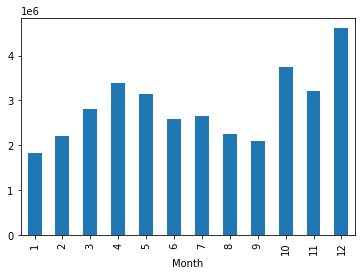

In [45]:
nan_data.groupby('Month').sum()['Sales'].plot.bar()

In [49]:
x = nan_data.groupby('Month').sum()

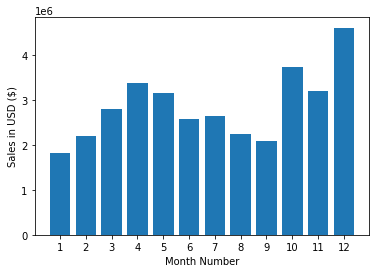

In [50]:
months = range(1,13)

plt.bar(months, x['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

Bulan `Desember` merupakan bulan dengan penjualan terbesar

**QUESTION 2** kota yang menjual produk terbanyak

In [64]:
#menambahkan kolom kota dengan apply()

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1] #mengambil state code dan hapus zipcode

nan_data['City'] = nan_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
#nan_data['City'] = nan_data['Purchase Address'].apply(lambda x:get_city(x) + ' (' + get_state(x)+')')
#nan_data['City'] = nan_data['Purchase Address'].apply(lambda x: x.split(',')[1])

nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA)
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)


<AxesSubplot:xlabel='City'>

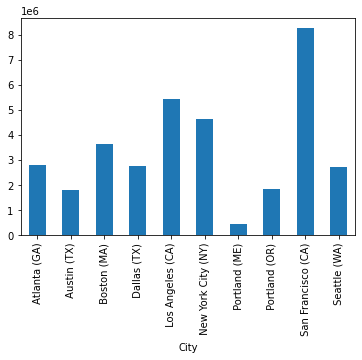

In [66]:
nan_data.groupby('City').sum()['Sales'].plot.bar()

In [69]:
y = nan_data.groupby('City').sum()
y.sort_values('Sales',ascending=False)

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Seattle (WA),16553,2.733296e+06,104941,2.747755e+06
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06


**Question 3** Pada waktu apa yang baik dalam mengiklankan produk agar laku untuk dibeli berdasarkan data yang ada?

In [71]:
nan_data['Order Date'] = pd.to_datetime(nan_data['Order Date'])
nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA)
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA)
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA)


In [76]:
nan_data['Hour'] = nan_data['Order Date'].dt.hour
nan_data['Minute'] = nan_data['Order Date'].dt.minute

nan_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.900000,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.989998,Boston (MA),22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),9,27


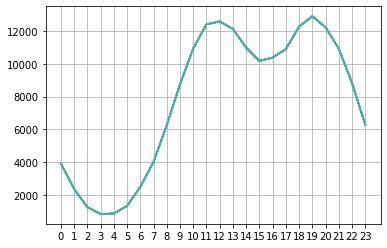

In [79]:
hours = [hour for hour, df in nan_data.groupby('Hour')]

plt.plot(hours, nan_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.show()

pada waktu sebelum **jam 11 AM** atau sekitar **jam 18-19 PM** merupakan waktu terbaik untuk melakukan pengiklanan

**QUESTION 4** Produk apa yang paling laku dalam penjualan

In [82]:
##mencari data duplikat

df = nan_data[nan_data['Order ID'].duplicated(keep=False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.990000,Los Angeles (CA),14,38
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.000000,Los Angeles (CA),19,42
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.950000,Los Angeles (CA),19,42
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.989998,Boston (MA),11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.840000,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.840000,Atlanta (GA),20,18
186803,259314,Wired Headphones,1,11.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.990000,Atlanta (GA),0,25
186804,259314,AAA Batteries (4-pack),2,2.990000,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.980000,Atlanta (GA),0,25
186841,259350,Google Phone,1,600.000000,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.000000,San Francisco (CA),13,49


In [85]:
df['Grouped Product'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped Product']].drop_duplicates()

df.head(20)

C:\Users\Aryo\AppData\Local\Temp/ipykernel_8700/3254845277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped Product'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped Product
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


https://www.youtube.com/watch?v=eMOA1pPVUc4&t=670s&ab_channel=KeithGalli